In [1]:
import fbprophet
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv("../data/num_crimes_time_series.csv")

data.head()

,offense_date,num_crimes
0,2011-01-01,242
1,2011-01-02,145
2,2011-01-03,133
3,2011-01-04,154
4,2011-01-05,142


In [2]:
data.dropna().describe()

,num_crimes
count,2882.000000
mean,139.657876
std,31.250889
min,62.000000
25%,119.000000
50%,136.000000
75%,157.000000
max,290.000000


In [23]:
data = data.rename(columns={'offense_date':'ds', 'num_crimes':'y'})
data_prophet = fbprophet.Prophet(changepoint_prior_scale=0.10)
data_prophet.fit(data)

INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [48]:
data_forecast = data_prophet.make_future_dataframe(periods=12*2, freq='M')
data_forecast = data_prophet.predict(data_forecast)

Text(0.5,1,'Projected Number of Crimes for Next Two Years')

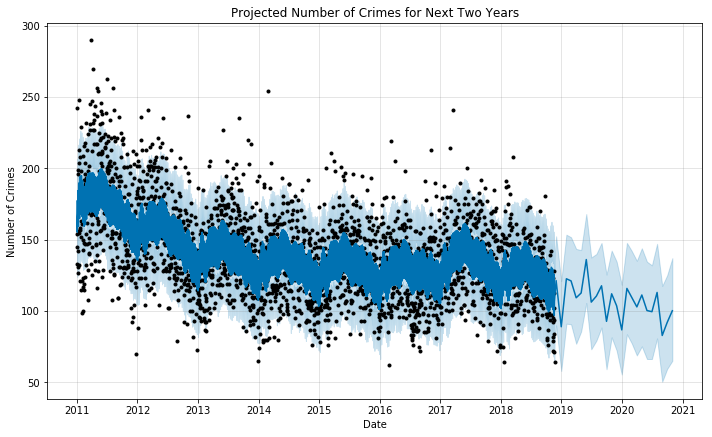

In [50]:
data_prophet.plot(data_forecast, xlabel='Date', ylabel='Number of Crimes')
plt.title('Projected Number of Crimes for Next Two Years')

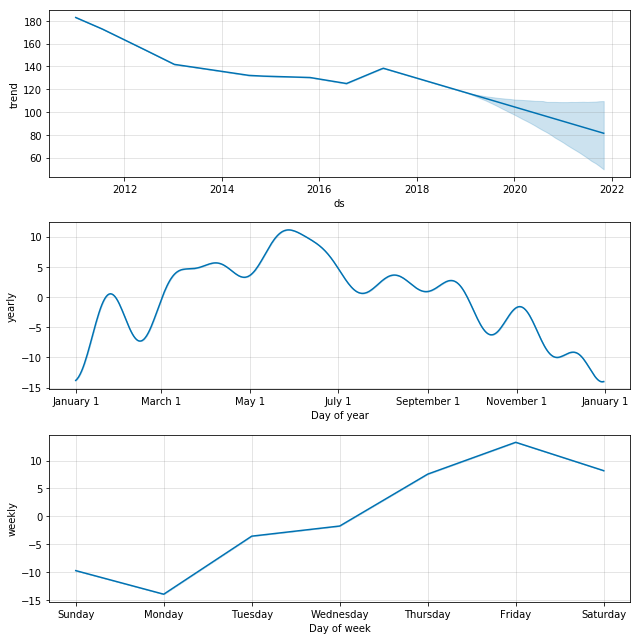

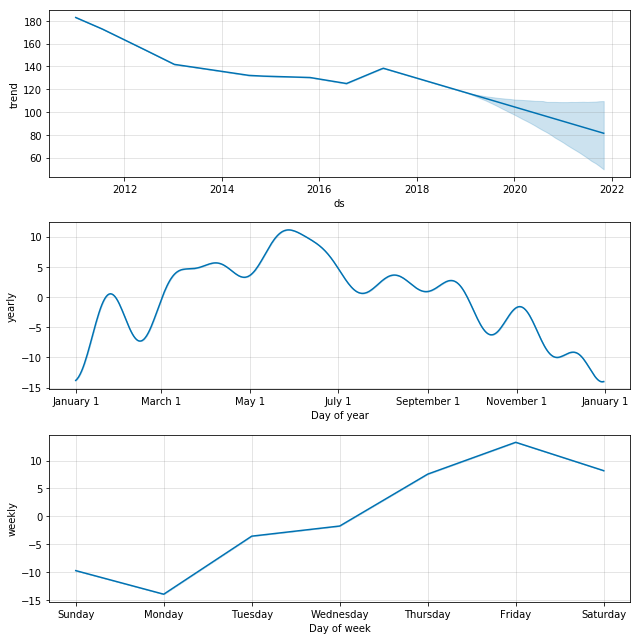

In [47]:
data_prophet.plot_components(data_forecast)